# Mas funciones de la API AlphaVantage

In [1]:
import requests
import pandas as pd

In [2]:
apikey = '2RG2NEF3IPXMIPX3'
apikey = '09QXTWMZ1UBWMPO8'
apikey = '09QXTWMZ1UBWMPO8'

## Series diarias

In [4]:
def getDaily(symbol, size, auto_adjust=False):
    function='TIME_SERIES_DAILY'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function' : function, 'symbol': symbol, 
                  'outputsize': size, 'apikey': apikey}

    r = requests.get(url, params=parametros)
    data = r.json()['Time Series (Daily)']
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df.columns = ['Open','High','Low','Close','Volume']
    df = df.sort_values('Date', ascending=True)
    df.index = pd.to_datetime(df.index)  
    
    
    # de tarea agregar lo necesario aca adentro para que tenga la misma funcionalidad que yfinance
    # trabajando con el parametro auto_adjust
    
    return df


In [5]:
data = getDaily(symbol='AAPL', size='full')
data

,Open,High,Low,Close,Volume
Date,,,,,
1999-11-01,80.00,80.69,77.3700,77.62,2487300.0
1999-11-02,78.00,81.69,77.3100,80.25,3564600.0
1999-11-03,81.62,83.25,81.0000,81.50,2932700.0
1999-11-04,82.06,85.37,80.6200,83.62,3384700.0
1999-11-05,84.62,88.37,84.0000,88.31,3721500.0
...,...,...,...,...,...
2021-06-07,126.17,126.32,124.8321,125.90,71057550.0
2021-06-08,126.60,128.46,126.2101,126.74,74403774.0
2021-06-09,127.21,127.75,126.5200,127.13,56877937.0


## Series Ajustadas

In [6]:
def getDailyAdj(symbol, size):
    function='TIME_SERIES_DAILY_ADJUSTED'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function' : function, 'symbol': symbol, 
                  'outputsize': size, 'apikey': apikey}

    r = requests.get(url, params=parametros)
    data = r.json()['Time Series (Daily)']
    df = pd.DataFrame.from_dict(data, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df.columns = ['Open','High','Low','Close','AdjClose','Volume','Div','Split']
    df = df.sort_values('Date', ascending=True).round(2)
    df.index = pd.to_datetime(df.index)    
    return df

data = getDailyAdj(symbol='AAPL', size='compact')
data

,Open,High,Low,Close,AdjClose,Volume,Div,Split
Date,,,,,,,,
2021-01-20,128.66,132.49,128.55,132.03,131.61,104319489.0,0.0,1.0
2021-01-21,133.80,139.67,133.59,136.87,136.43,120529544.0,0.0,1.0
2021-01-22,136.28,139.85,135.02,139.07,138.63,114459360.0,0.0,1.0
2021-01-25,143.07,145.09,136.54,142.92,142.47,157611713.0,0.0,1.0
2021-01-26,143.60,144.30,141.37,143.16,142.70,98390555.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2021-06-07,126.17,126.32,124.83,125.90,125.90,71057550.0,0.0,1.0
2021-06-08,126.60,128.46,126.21,126.74,126.74,74403774.0,0.0,1.0
2021-06-09,127.21,127.75,126.52,127.13,127.13,56877937.0,0.0,1.0


Por ejemplo si con este request quiero ver todas las ruedas donde se aplicó split a AAPL, solo pongo:

In [5]:
data = getDailyAdj(symbol='AAPL', size='full')
data.loc[data.Split > 1]

,Open,High,Low,Close,AdjClose,Volume,Div,Split
Date,,,,,,,,
2000-06-21,50.50,56.94,50.31,55.63,0.85,4375000.0,0.0,2.0
2005-02-28,44.68,45.14,43.96,44.86,1.38,11635900.0,0.0,2.0
2014-06-09,92.70,93.88,91.75,93.70,21.07,75414997.0,0.0,7.0
2020-08-31,127.58,131.00,126.00,129.04,128.41,223505733.0,0.0,4.0


O si quiero saber la cantidad de ruedas donde KO pagó dividendos en los ultimos 20 años (la API me trae valores de los ultimos 20 años)

In [7]:
data = getDailyAdj(symbol='KO', size='full')
data.loc[data.Div > 0]

,Open,High,Low,Close,AdjClose,Volume,Div,Split
Date,,,,,,,,
1999-11-29,65.88,67.19,65.75,67.06,18.82,4260100.0,0.16,1.0
2000-03-13,43.25,44.31,43.13,43.75,12.33,7823200.0,0.17,1.0
2000-06-13,53.00,54.00,52.81,53.38,15.09,2813100.0,0.17,1.0
2000-09-13,53.50,53.69,52.06,52.50,14.89,3493200.0,0.17,1.0
2000-11-29,59.75,62.50,59.75,62.13,17.67,4846000.0,0.17,1.0
...,...,...,...,...,...,...,...,...
2020-03-13,49.51,49.56,46.61,48.47,46.89,33684332.0,0.41,1.0
2020-06-12,46.21,46.25,45.01,45.60,44.51,21813209.0,0.41,1.0
2020-09-14,50.97,51.23,50.57,50.71,49.89,10911657.0,0.41,1.0


Bueno, si seguimos explorando la Doc de la API vemos que tiene las siguientes funciones:

* TIME_SERIES_WEEKLY
* TIME_SERIES_WEEKLY_ADJUSTED
* TIME_SERIES_MONTHLY
* TIME_SERIES_MONTHLY_ADJUSTED

### Cotización actual

La llamada para esta función es function='GLOBAL_QUOTE' y el parámetro obligatorio aparte del token es el "symbol"

In [8]:
def quote(symbol):
    function='GLOBAL_QUOTE'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'symbol':symbol, 'apikey':apikey}

    r = requests.get(url, params=parametros)
    return r.json()

data = quote(symbol='AAPL')
data

{'Global Quote': {'01. symbol': 'AAPL',
  '02. open': '126.5300',
  '03. high': '127.4400',
  '04. low': '126.1000',
  '05. price': '127.3500',
  '06. volume': '53522373',
  '07. latest trading day': '2021-06-11',
  '08. previous close': '126.1100',
  '09. change': '1.2400',
  '10. change percent': '0.9833%'}}

### Cotizaciones de otros mercados

In [9]:
data = quote(symbol='PETR3.SAO')
data

{'Global Quote': {'01. symbol': 'PETR3.SAO',
  '02. open': '29.5800',
  '03. high': '29.7000',
  '04. low': '29.0700',
  '05. price': '29.3000',
  '06. volume': '15316600',
  '07. latest trading day': '2021-06-11',
  '08. previous close': '29.5300',
  '09. change': '-0.2300',
  '10. change percent': '-0.7789%'}}

### Búsqueda de Activos

In [11]:
def search(keywords):
    function='SYMBOL_SEARCH'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'keywords':keywords, 'apikey':apikey}

    r = requests.get(url, params=parametros)
    js= r.json()['bestMatches']
    df = pd.DataFrame(js)
    return df

data = search(keywords='petro')
data

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,PETRY,Petrobras Distribuidora S.A.,Equity,United States,09:30,16:00,UTC-04,USD,0.8000
1,PTR,PetroChina Co. Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.7500
2,PZE,Petrobras Argentina SA,Equity,United States,09:30,16:00,UTC-04,USD,0.5000
3,PEFGF,Petrobras Energ Ord,Equity,United States,09:30,16:00,UTC-04,USD,0.4000
4,PTIFF,Petroceltic Intl Ord,Equity,United States,09:30,16:00,UTC-04,USD,0.4000
5,601857.SHH,PetroChina Company Ltd,Equity,Shanghai,09:30,15:00,UTC+08,CNY,0.3704
6,PC6A.FRK,PetroChina Company Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.3226
7,PC6.FRK,PetroChina Company Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.3226
8,BRDT3.SAO,Petrobras Distribuidora S.A,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.3125
9,PCCYF,PetroChina Co. Ltd - Class H,Equity,United States,09:30,16:00,UTC-04,USD,0.3030


### FOREX

In [12]:
def fx(fromC, toC):
    function='CURRENCY_EXCHANGE_RATE'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'from_currency':fromC, 
                  'to_currency':toC, 'apikey':apikey}

    r = requests.get(url, params=parametros)
    return r.json()

data = fx('USD','ARS')
print(json.dumps(data, indent=3))

{
   "Realtime Currency Exchange Rate": {
      "1. From_Currency Code": "USD",
      "2. From_Currency Name": "United States Dollar",
      "3. To_Currency Code": "ARS",
      "4. To_Currency Name": "Argentine Peso",
      "5. Exchange Rate": "95.13000000",
      "6. Last Refreshed": "2021-06-14 08:16:31",
      "7. Time Zone": "UTC",
      "8. Bid Price": "95.12800000",
      "9. Ask Price": "95.13200000"
   }
}


También la API me permite obtener el intradiario del par con la función FX_INTRADAY

In [13]:
def fxIntra(fromC, toC, interval):
    function='FX_INTRADAY'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'from_symbol':fromC, 
                  'to_symbol':toC, 'interval':interval,'apikey':apikey}

    r = requests.get(url, params=parametros)
    js = r.json()['Time Series FX ('+ interval +')']
    
    df = pd.DataFrame.from_dict(js, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df.columns = ['Open','High','Low','Close']
    df = df.sort_values('Date', ascending=True).round(2)
    df.index = pd.to_datetime(df.index)    
    return df

data = fxIntra('USD','ARS','5min')
data

,Open,High,Low,Close
Date,,,,
2021-06-13 23:50:00,95.13,95.13,95.13,95.13
2021-06-13 23:55:00,95.13,95.13,95.13,95.13
2021-06-14 00:00:00,95.13,95.13,95.13,95.13
2021-06-14 00:05:00,95.13,95.13,95.13,95.13
2021-06-14 00:10:00,95.13,95.13,95.13,95.13
...,...,...,...,...
2021-06-14 07:45:00,95.13,95.13,95.13,95.13
2021-06-14 07:50:00,95.13,95.13,95.13,95.13
2021-06-14 07:55:00,95.13,95.13,95.13,95.13


De modo muy similar a las funciones de equity historicos tenemos para Forex

In [14]:
def fxDaily(fromC, toC, size):
    function='FX_DAILY'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'from_symbol':fromC, 'to_symbol':toC, 
                  'outputsize':size ,'apikey':apikey}

    r = requests.get(url, params=parametros)
    js = r.json()['Time Series FX (Daily)']
    df = pd.DataFrame.from_dict(js, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df.columns = ['Open','High','Low','Close']
    df = df.sort_values('Date', ascending=True).round(2)
    df.index = pd.to_datetime(df.index)    
    return df

data = fxDaily('USD','ARS','full')
data

,Open,High,Low,Close
Date,,,,
2014-11-24,8.51,8.52,8.51,8.52
2014-11-25,8.52,8.52,8.51,8.52
2014-11-26,8.52,8.52,8.52,8.52
2014-11-27,8.52,8.52,8.52,8.52
2014-11-28,8.52,8.53,8.52,8.53
...,...,...,...,...
2021-06-08,94.78,95.01,94.78,94.82
2021-06-09,94.82,95.06,94.82,95.05
2021-06-10,95.05,95.09,95.05,95.09


Y no se los muestra pero es exactamente igual para monthly y weekly con las funciones:
* FX_WEEKLY
* FX_MONTHLY

### Crypto

In [15]:
def cryptoRank(symbol):
    function='CRYPTO_RATING'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'symbol':symbol, 'apikey':apikey}

    r = requests.get(url, params=parametros)
    return r.json()

data = cryptoRank('BTC')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "BTC",
      "2. name": "Bitcoin",
      "3. fcas rating": "Attractive",
      "4. fcas score": "895",
      "5. developer score": "849",
      "6. market maturity score": "876",
      "7. utility score": "957",
      "8. last refreshed": "2021-06-13 00:00:00",
      "9. timezone": "UTC"
   }
}


In [16]:
data = cryptoRank('ADA')
print(json.dumps(data, indent=3))

{
   "Crypto Rating (FCAS)": {
      "1. symbol": "ADA",
      "2. name": "Cardano",
      "3. fcas rating": "Superb",
      "4. fcas score": "965",
      "5. developer score": "966",
      "6. market maturity score": "904",
      "7. utility score": "976",
      "8. last refreshed": "2021-06-13 00:00:00",
      "9. timezone": "UTC"
   }
}


## Indicadores Técnicos

Medias Móviles:

*  SMA, EMA, WMA (Medias móviles simple, exponencial y ponderada)
*  DEMA, TEMA (Media movil doble exponencial y triple)
*  TRIMA (Media exponencial triangular)
*  KAMA (Media movil adaptativa: Kaufman)
*  MAMA (MESA adaptive moving average, otra media movil adaptativa)

Inidicadores Super conocidos:
*  MACD (El conocidísimo oscilador ideal para ver divergengias)
*  STOCH, STOCHF (El conocido osiclador estacástico)
*  RSI (El conocidísimo oscilador de Fuerza relativa ideal para divergencias)
*  ADX (Indicador de tendencia, conocidisimo como Average Directional Movement Index)
*  DX (Es el ADX pero sin suavizar)


*  CCI (Commodity channel index, Indicador de inicio y fin de tendencias, zonas de sobrecompra/sobreventa o divergencias)
*  AROON (Anticipador de inicios de tendencias compuesto por dos curvas)
*  BBANDS (Famosas bandas de bollinger, bandas de rango de movimiento a +/- 2 sigmas de media movil)
*  SAR (famoso Parabolic SAR, se usa como Trailing StopLoss para cerrar posiciones)


*  ATR (Average true range,es la media movil del True Range, es decir la media movil del rango de movimiento, proxy de la volatilidad pero en terminos absolutos)


*  VWAP (Precio ponderado por volumen)
*  OBV (On Balance Volume, acumulador del volumen, cuando cierra Up se suma vol, y cuendo cierra abajo se resta)
*  AD (Chaikin Acumulación/Distribución, una mejora del OBV con una ponderación de la forma de la vela)

Otros inidicadores
*  T3 (Una media movil basada en la doble exponencial)
*  MACDEXT (Es el MACD con la posibilidad de usar otros tipos de medias móviles que la EMA)
*  STOCHRSI (Oscilador estocastico del oscilador RSI)
*  WILLR (Oscilador de Williams, similar al estocástico)
*  ADXR (Promedio del ADX contra el ADX de "n" ruedas atras)
*  APO (Absolute price oscillator, Es una diferencia de medias móviles, simples, exponenciales, etc)
*  PPO (Percentage price oscillator, Es la diferencia porcentual de las medias moviles)
*  MOM (El famoso "Momentum", es la diferencia entre el precio y el precio "n" ruedas atrás)
*  BOP (Balance of power) dado el OHLC es la media movil de (C-O)/(H-L), se supone que cuando pasa de negativo a positivo marca señal de compra y viceversa
*  CMO (Chande momentum oscillator, es una variante del oscilador RSI)
*  ROC (Es como el Momentum pero %, mide variación % respecto a "n" ruedas atrás)
*  AROONOSC (Es la diferencia entre las curvas del AROON)
*  MFI (Money flow index, es un oscilador que se interpreta como el RSI y que tiene en cuenta el volumen)
*  TRIX (Es un oscilador de la TEMA respecto de "n" ruedas atrás)
*  ULTOSC (Ultimate oscillator, es un osclador de 3 períodos, como promediar 3 RSIs con 3 "n" diferentes)
*  MINUS_DI, PLUS_DI, MINUS_DM, PLUS_DM (Componentes del ADX)
*  MIDPOINT (El promedio entre el Maximo y Mínimo de una serie de "n" velas puede ser de el "H" el "O", "L" o "C")
*  MIDPRICE (El promedio entre el Máximo "High" y Mínimo "Low" de la serie de "n" velas)
*  TRANGE (True range, es un estimador del rango normal de trading o movimiento)
*  ADOSC (Oscilador del Chaikin AD)
*  HT_TRENDLINE, HT_SINE, HT_TRENDMODE, HT_DCPERIOD, HT_DCPHASE, HT_PHASOR, son todos indicadores de la "descomposición" de los precios en la transformada de Hilbert, es un método usado para el procesamiento de señales

Link con formulas: 

* https://www.fmlabs.com/reference/default.htm
* https://docs.anychart.com/Stock_Charts/Technical_Indicators/Mathematical_Description#overview

### Medias Móviles

Puedo hacer una función para cada tipo de media movil, de la siguiente forma por ejemplo para la SMA:

In [17]:
def SMA(symbol, interval, series_type, time_period):
    function='SMA'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'symbol':symbol, 'interval':interval, 
                  'series_type':series_type,'time_period':time_period ,'apikey':apikey}

    r = requests.get(url, params=parametros)
    js = r.json()['Technical Analysis: SMA']
    df = pd.DataFrame.from_dict(js, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df = df.sort_values('Date', ascending=True).round(2)
    df.index = pd.to_datetime(df.index)    
    return df

data = SMA('AAPL','5min','close', 50)
data

,SMA
Date,
2021-05-17 08:25:00,126.90
2021-05-17 08:30:00,126.89
2021-05-17 08:35:00,126.89
2021-05-17 08:40:00,126.89
2021-05-17 08:45:00,126.90
...,...
2021-06-11 19:40:00,127.26
2021-06-11 19:45:00,127.27
2021-06-11 19:50:00,127.27


De esa forma obtuve la media movil de 50 velas de los precios de cierre, en un timeframe de 5min de AAPL
<br><br>Ahora bien, si quisiera calcular en lugar de la SMA la EMA, si veo la doc de la API son exactamente los mismo parámetros que la SMA, solo cambia el parámetro "function" que en lugar de ser "SMA" es "EMA" por lo tanto andar haciendo funciones diferentes para cada tipo de media movil, lo mejor es definir una sola función que tome el tipo de media movil como parámetro y listo, sería algo  así:

In [18]:
def movingAv(symbol, interval, series_type, time_period, mean_type='SMA'):
    function = mean_type
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'symbol':symbol, 'interval':interval, 
                  'series_type':series_type,'time_period':time_period ,'apikey':apikey}

    r = requests.get(url, params=parametros)
    js = r.json()['Technical Analysis: '+mean_type]
    df = pd.DataFrame.from_dict(js, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df = df.sort_values('Date', ascending=True).round(2)
    df.index = pd.to_datetime(df.index)    
    return df

data = movingAv('AAPL','5min','close', 50, 'TRIMA')
data

,TRIMA
Date,
2021-05-17 08:25:00,126.90
2021-05-17 08:30:00,126.89
2021-05-17 08:35:00,126.89
2021-05-17 08:40:00,126.88
2021-05-17 08:45:00,126.87
...,...
2021-06-11 19:40:00,127.27
2021-06-11 19:45:00,127.27
2021-06-11 19:50:00,127.27


Ahora con esta función si quiero la Triple Exponencial solo cambio ese argumento cuando llamo a la función y ya

In [19]:
data = movingAv('AAPL','daily','close', 50, 'TEMA')
data

,TEMA
Date,
2000-06-01,0.69
2000-06-02,0.69
2000-06-05,0.68
2000-06-06,0.68
2000-06-07,0.68
...,...
2021-06-07,125.42
2021-06-08,125.46
2021-06-09,125.55


### MACD

In [20]:
def MACD(symbol, interval, series_type='close', fastperiod=12, slowperiod=26, signalperiod=9):
    function='MACD'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function, 'symbol':symbol, 'interval':interval, 
                  'series_type':series_type, 'fastperiod': fastperiod, 
                  'slowperiod':slowperiod, 'signalperiod':signalperiod,
                  'apikey':apikey }

    r = requests.get(url, params=parametros)
    js = r.json()['Technical Analysis: MACD']
    df = pd.DataFrame.from_dict(js, orient='index')
    df = df.astype('float')
    df.index.name = 'Date'
    df = df.sort_values('Date', ascending=True).round(2)
    df.index = pd.to_datetime(df.index)    
    return df

data = MACD('AAPL','5min')
data

,MACD_Signal,MACD_Hist,MACD
Date,,,
2021-05-17 07:05:00,-0.05,-0.02,-0.07
2021-05-17 07:10:00,-0.05,-0.02,-0.07
2021-05-17 07:15:00,-0.06,-0.01,-0.07
2021-05-17 07:20:00,-0.06,-0.00,-0.06
2021-05-17 07:25:00,-0.06,0.00,-0.06
...,...,...,...
2021-06-11 19:40:00,0.00,0.00,0.01
2021-06-11 19:45:00,0.01,0.00,0.01
2021-06-11 19:50:00,0.01,0.01,0.01


# API de Ameritrade

Para acceder a la API de TDA el broker ameritrade, hay que ingresar a https://developer.tdameritrade.com/
    
Y obviamente sacarse una cuenta de usuario gratuita, yo saqué la mia

Una vez creada la cuenta tienen que crear una app para que le den una "Consumer Key" similar a esta:

In [1]:
c_key = 'AHSA7C8FWZZFRG1W15WOJLQY8WRSCOVI'
c_key = "NYF6LZZITQAOCYNQHYUZOJF4XGDPT0KK"

Una vez obtenida la key pueden usarla para llamar a la API

In [2]:
import requests

In [3]:
def getQuote(symbol):
    
    endpoint = 'https://api.tdameritrade.com/v1/marketdata/'+symbol+'/quotes?'
    
    p  ={'apikey' : c_key}
    r = requests.get(url=endpoint ,params=p)
    return r.json()[symbol]

quote = getQuote('AAPL')
quote

{'assetType': 'EQUITY',
 'assetMainType': 'EQUITY',
 'cusip': '037833100',
 'symbol': 'AAPL',
 'description': 'Apple Inc. - Common Stock',
 'bidPrice': 129.89,
 'bidSize': 1000,
 'bidId': 'Z',
 'askPrice': 129.9,
 'askSize': 500,
 'askId': 'P',
 'lastPrice': 129.9,
 'lastSize': 100,
 'lastId': 'D',
 'openPrice': 129.94,
 'highPrice': 130.6,
 'lowPrice': 129.39,
 'bidTick': ' ',
 'closePrice': 130.48,
 'netChange': -0.58,
 'totalVolume': 29795551,
 'quoteTimeInLong': 1623772641733,
 'tradeTimeInLong': 1623772641824,
 'mark': 129.9,
 'exchange': 'q',
 'exchangeName': 'NASD',
 'marginable': True,
 'shortable': True,
 'volatility': 0.0063,
 'digits': 4,
 '52WkHigh': 145.09,
 '52WkLow': 83.145,
 'nAV': 0.0,
 'peRatio': 28.5766,
 'divAmount': 0.88,
 'divYield': 0.67,
 'divDate': '2021-05-07 00:00:00.000',
 'securityStatus': 'Normal',
 'regularMarketLastPrice': 129.9,
 'regularMarketLastSize': 1,
 'regularMarketNetChange': -0.58,
 'regularMarketTradeTimeInLong': 1623772641824,
 'netPercentCha

In [4]:
def getQuotes(symbols):
    
    endpoint = 'https://api.tdameritrade.com/v1/marketdata/quotes'
    r = requests.get(url=endpoint, params={'apikey' : c_key, 'symbol':symbols})
    
    return r.json()

quotes = getQuotes('AAPL,YPF')

quotes.keys()

dict_keys(['AAPL', 'YPF'])

In [5]:
quotes['AAPL']

{'assetType': 'EQUITY',
 'assetMainType': 'EQUITY',
 'cusip': '037833100',
 'symbol': 'AAPL',
 'description': 'Apple Inc. - Common Stock',
 'bidPrice': 129.9,
 'bidSize': 500,
 'bidId': 'P',
 'askPrice': 129.91,
 'askSize': 1800,
 'askId': 'K',
 'lastPrice': 129.9,
 'lastSize': 200,
 'lastId': 'Y',
 'openPrice': 129.94,
 'highPrice': 130.6,
 'lowPrice': 129.39,
 'bidTick': ' ',
 'closePrice': 130.48,
 'netChange': -0.58,
 'totalVolume': 29797183,
 'quoteTimeInLong': 1623772643189,
 'tradeTimeInLong': 1623772643075,
 'mark': 129.9,
 'exchange': 'q',
 'exchangeName': 'NASD',
 'marginable': True,
 'shortable': True,
 'volatility': 0.0063,
 'digits': 4,
 '52WkHigh': 145.09,
 '52WkLow': 83.145,
 'nAV': 0.0,
 'peRatio': 28.5766,
 'divAmount': 0.88,
 'divYield': 0.67,
 'divDate': '2021-05-07 00:00:00.000',
 'securityStatus': 'Normal',
 'regularMarketLastPrice': 129.9,
 'regularMarketLastSize': 2,
 'regularMarketNetChange': -0.58,
 'regularMarketTradeTimeInLong': 1623772643075,
 'netPercentCha

### Precios históricos

* Periodos válidos para cada periodType (los del * son los default)
    * day: 1, 2, 3, 4, 5, 10*
    * month: 1*, 2, 3, 6
    * year: 1*, 2, 3, 5, 10, 15, 20
    * ytd: 1*

* FrequencyType válidos para cada periodType (los del * son los default)
    * day: minute*
    * month: daily, weekly*
    * year: daily, weekly, monthly*
    * ytd: daily, weekly*
    
* Frequency válidos para cada FrequencyType (los del * son los default)
    * minute: 1*, 5, 10, 15, 30
    * daily: 1*
    * weekly: 1*
    * monthly: 1*

Otros parámetros posibles:
    * startDate: timestamp milisegundos desde epoch
    * endDate: timestamp milisegundos desde epoch

In [6]:
import pandas as pd

def getHist(symbol, periodT='day', period=1, freqT='minute', freq=1, na='true'):
    
    
    params = {'symbol':symbol, 'periodType':periodT, 'period':period, 
              'apikey' : c_key, 'frequencyType':freqT, 'frequency':freq ,
              'needExtendedHoursData':na}
    
    url_base='https://api.tdameritrade.com/v1/marketdata/'
    
    endpoint = url_base + symbol+'/pricehistory'
    
    r = requests.get(url=endpoint ,params=params)
    try:
        js = r.json()['candles']
        df = pd.DataFrame(js)
        df['fecha'] = pd.to_datetime(df.datetime - 3600*1000*3, unit='ms')
    except:
        print('Error, ojo que tenemos una rta inesperada', r.json())
        df = pd.DataFrame()
        
    return df

data = getHist('GGAL', periodT='day', period=1, freqT='minute', freq=1, na='false')
data

,open,high,low,close,volume,datetime,fecha
0,9.920,9.920,9.7900,9.840,50410,1623677400000,2021-06-14 10:30:00
1,9.950,9.960,9.9500,9.960,299,1623677580000,2021-06-14 10:33:00
2,9.960,9.960,9.9600,9.960,450,1623677640000,2021-06-14 10:34:00
3,9.940,9.970,9.9400,9.950,7598,1623677760000,2021-06-14 10:36:00
4,9.990,10.010,9.9899,10.010,3900,1623677820000,2021-06-14 10:37:00
...,...,...,...,...,...,...,...
340,10.100,10.100,10.0900,10.095,2451,1623700500000,2021-06-14 16:55:00
341,10.095,10.095,10.0900,10.090,1000,1623700560000,2021-06-14 16:56:00
342,10.095,10.100,10.0900,10.095,2290,1623700620000,2021-06-14 16:57:00
343,10.095,10.095,10.0800,10.080,12494,1623700680000,2021-06-14 16:58:00


Como verán en este caso usamos un try/except por si pasamos mal algun parámetro pero que ademas del mensaje de error me devuelva igual el dataFrame vacio

Esto es una buena práctica ppara evitar cortes del flujo del script inesperados

### Fundamentals

In [7]:
def fundamentals(symbol, pr='fundamental'):
    
    params = {'apikey' : c_key, 'symbol':symbol, 'projection': pr}
    
    endpoint = 'https://api.tdameritrade.com/v1/instruments'
    
    r = requests.get(url=endpoint ,params=params)
    return r.json()

fundamentals('AAPL')

{'AAPL': {'fundamental': {'symbol': 'AAPL',
   'high52': 145.09,
   'low52': 83.145,
   'dividendAmount': 0.88,
   'dividendYield': 0.67,
   'dividendDate': '2021-05-07 00:00:00.000',
   'peRatio': 29.27891,
   'pegRatio': 0.736688,
   'pbRatio': 31.47285,
   'prRatio': 6.69134,
   'pcfRatio': 24.96219,
   'grossMarginTTM': 39.88126,
   'grossMarginMRQ': 42.50647,
   'netProfitMarginTTM': 23.45101,
   'netProfitMarginMRQ': 26.37748,
   'operatingMarginTTM': 27.32064,
   'operatingMarginMRQ': 30.70079,
   'returnOnEquity': 103.4003,
   'returnOnAssets': 23.21042,
   'returnOnInvestment': 33.53747,
   'quickRatio': 1.09269,
   'currentRatio': 1.14175,
   'interestCoverage': 0.0,
   'totalDebtToCapital': 63.74756,
   'ltDebtToEquity': 157.047,
   'totalDebtToEquity': 175.8435,
   'epsTTM': 4.45645,
   'epsChangePercentTTM': 39.744,
   'epsChangeYear': 118.6195,
   'epsChange': 0.0,
   'revChangeYear': 0.0,
   'revChangeTTM': 21.42876,
   'revChangeIn': 0.0,
   'sharesOutstanding': 1668763

### Cadena de Opciones

Este es el endpoint mas jugoso de la API a mi entender ya que es un dato de mercado dificil de conseguir en  formma gratuita y fidedigna esto de las cadenas de opciones

Les dejo la implementación en python de un llamado al endpoint de opciones sencillo que me devuelve en principio todo un json y como es muy compleja la estructura vamos trabajandola de a poco luego

In [8]:
import requests

def options(symbol):
    
    params = {'apikey' : c_key, 'symbol':symbol}
    
    endpoint = 'https://api.tdameritrade.com/v1/marketdata/chains'
    
    r = requests.get(url=endpoint ,params=params)
    return r.json()

chain = options('GGAL')
chain

{'symbol': 'GGAL',
 'status': 'SUCCESS',
 'underlying': None,
 'strategy': 'SINGLE',
 'interval': 0.0,
 'isDelayed': True,
 'isIndex': False,
 'interestRate': 0.1,
 'underlyingPrice': 9.83,
 'volatility': 29.0,
 'daysToExpiration': 0.0,
 'numberOfContracts': 68,
 'putExpDateMap': {'2021-06-18:3': {'2.5': [{'putCall': 'PUT',
     'symbol': 'GGAL_061821P2.5',
     'description': 'GGAL Jun 18 2021 2.5 Put',
     'exchangeName': 'OPR',
     'bid': 0.0,
     'ask': 0.05,
     'last': 0.0,
     'mark': 0.03,
     'bidSize': 0,
     'askSize': 279,
     'bidAskSize': '0X279',
     'lastSize': 0,
     'highPrice': 0.0,
     'lowPrice': 0.0,
     'openPrice': 0.0,
     'closePrice': 0.0,
     'totalVolume': 0,
     'tradeDate': None,
     'tradeTimeInLong': 0,
     'quoteTimeInLong': 1623773635881,
     'netChange': 0.0,
     'volatility': 671.85,
     'delta': -0.009,
     'gamma': 0.004,
     'theta': -0.022,
     'vega': 0.0,
     'rho': 0.0,
     'openInterest': 0,
     'timeValue': 0.03,
 

Lo que me devuelve es una estructura mas o menos asi:


{'symbol': 'GGAL',<br>
 'status': 'SUCCESS',<br>
 'underlying': None,<br>
 'strategy': 'SINGLE',<br>
 'interval': 0.0,<br>
 'isDelayed': True,<br>
 'isIndex': False,<br>
 'interestRate': 0.1,<br>
 'underlyingPrice': 11.41,<br>
 'volatility': 29.0,<br>
 'daysToExpiration': 0.0,<br>
 'numberOfContracts': 120,<br>
 'putExpDateMap': {'2020-07-17:0': {'2.5': [.. y aca todas las claves de ese strike de ese vencimiento de ese side(put)
 
 ... y asi los (en este caso 60) puts, y luego lo mismo para los 60 calls

Como esa estructura es demasiado rebuscada para listar, calcular, graficar, etc, vamos mejor a crear listados de fechas de vencimientos y de contratos por un lado y luego vamos a ir metiendolo en un dataFrame

In [9]:
v_calls = list(chain['callExpDateMap'].values())
v_calls_fechas = list(chain['callExpDateMap'].keys())
v_puts = list(chain['putExpDateMap'].values())
v_puts_fechas = list(chain['putExpDateMap'].keys())

print(v_calls_fechas)

['2021-06-18:3', '2021-07-16:31', '2021-10-15:122', '2022-01-21:220', '2023-01-20:584']


Bueno, como vemos ahi ya tenemos los vencimientos y los contratos, ahora resta recorrer esas listas y meter la data en un frame

In [17]:
v_calls = list(chain['callExpDateMap'].values())
v_calls_fechas = list(chain['callExpDateMap'].keys())
v_puts = list(chain['putExpDateMap'].values())
v_puts_fechas = list(chain['putExpDateMap'].keys())

calls = []
for i in range(len(v_calls)):
    v = list(v_calls[i].values())    
    for j in range(len(v)):
        calls.append(v[j][0])

puts = []
for i in range(len(v_puts)):
    v = list(v_puts[i].values())    
    for j in range(len(v)):
        puts.append(v[j][0])
        
contracts = pd.concat([pd.DataFrame(calls),pd.DataFrame(puts)])
contracts.columns

Index(['putCall', 'symbol', 'description', 'exchangeName', 'bid', 'ask',
       'last', 'mark', 'bidSize', 'askSize', 'bidAskSize', 'lastSize',
       'highPrice', 'lowPrice', 'openPrice', 'closePrice', 'totalVolume',
       'tradeDate', 'tradeTimeInLong', 'quoteTimeInLong', 'netChange',
       'volatility', 'delta', 'gamma', 'theta', 'vega', 'rho', 'openInterest',
       'timeValue', 'theoreticalOptionValue', 'theoreticalVolatility',
       'optionDeliverablesList', 'strikePrice', 'expirationDate',
       'daysToExpiration', 'expirationType', 'lastTradingDay', 'multiplier',
       'settlementType', 'deliverableNote', 'isIndexOption', 'percentChange',
       'markChange', 'markPercentChange', 'nonStandard', 'inTheMoney', 'mini'],
      dtype='object')

In [18]:
contracts.transpose().iloc[:,0]

putCall                                        CALL
symbol                              GGAL_061821C2.5
description               GGAL Jun 18 2021 2.5 Call
exchangeName                                    OPR
bid                                             7.2
ask                                             7.4
last                                              0
mark                                            7.3
bidSize                                         167
askSize                                          20
bidAskSize                                   167X20
lastSize                                          0
highPrice                                         0
lowPrice                                          0
openPrice                                         0
closePrice                                     7.61
totalVolume                                       0
tradeDate                                      None
tradeTimeInLong                                   0
quoteTimeInL

Como la cantidad de columnas es muy grande, armamos una tabla cualquiera para mostrar mas columnas

In [19]:
tabla = contracts.loc[contracts.daysToExpiration > 0]

tabla = tabla.loc[:,['strikePrice','daysToExpiration','putCall','bid','ask',
                     'last','volatility','openInterest',
                     'theoreticalOptionValue']]

tabla.columns = ['Strike','Dias','Tipo','Bid','Ask',
                  'Ultimo','VI','OpenInt','PrimaT']
tabla

,Strike,Dias,Tipo,Bid,Ask,Ultimo,VI,OpenInt,PrimaT
0,2.5,3,CALL,7.20,7.40,0.00,671.850,0,7.350
1,5.0,3,CALL,4.70,4.90,5.20,349.341,4,4.850
2,7.5,3,CALL,2.25,2.60,3.00,158.461,423,2.350
3,10.0,3,CALL,0.10,0.20,0.15,57.171,742,0.150
4,12.5,3,CALL,0.00,0.05,0.05,137.535,109,0.025
...,...,...,...,...,...,...,...,...,...
29,10.0,584,PUT,1.60,3.00,2.50,48.153,324,2.300
30,12.5,584,PUT,2.65,5.40,5.40,52.106,34,4.188
31,15.0,584,PUT,6.20,8.20,8.36,48.655,2,5.971
32,17.5,584,PUT,8.40,8.80,9.35,49.053,32,8.107


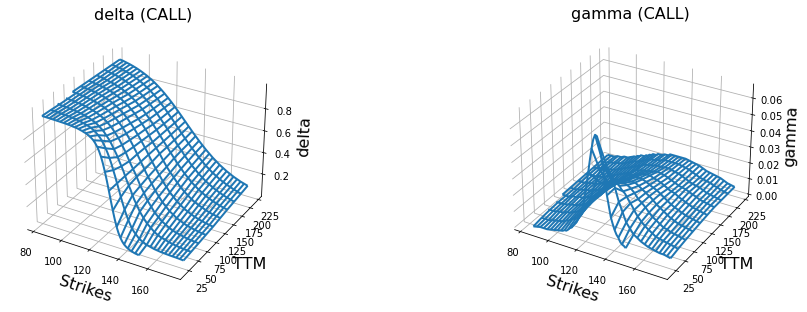

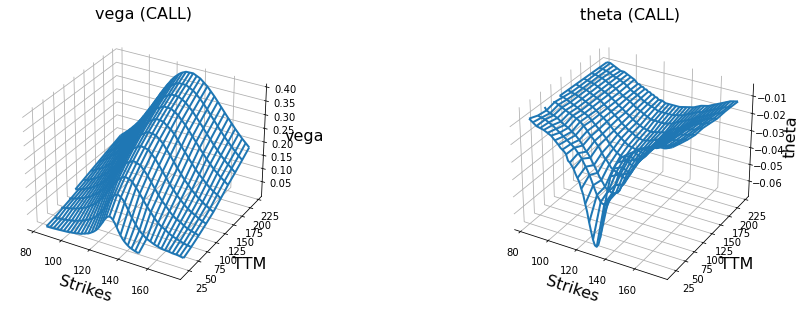

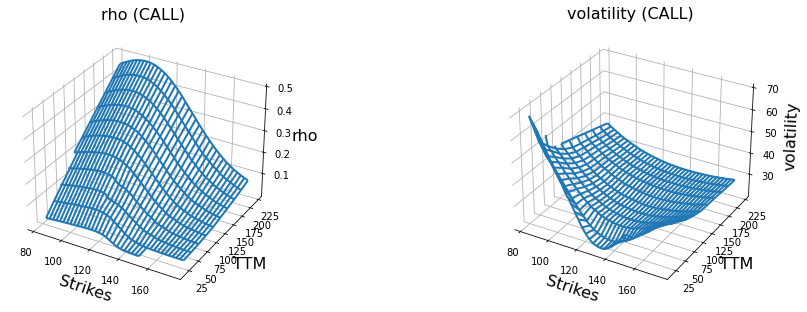

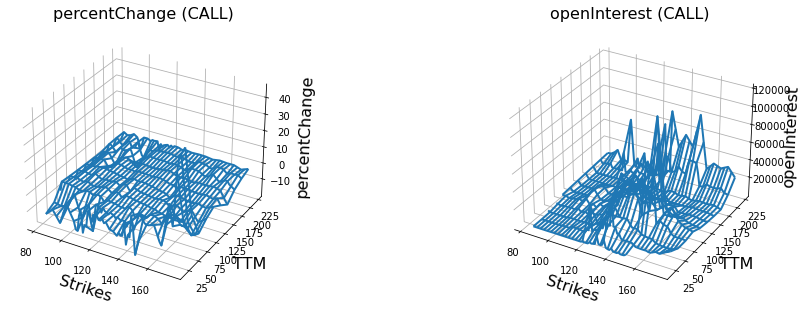

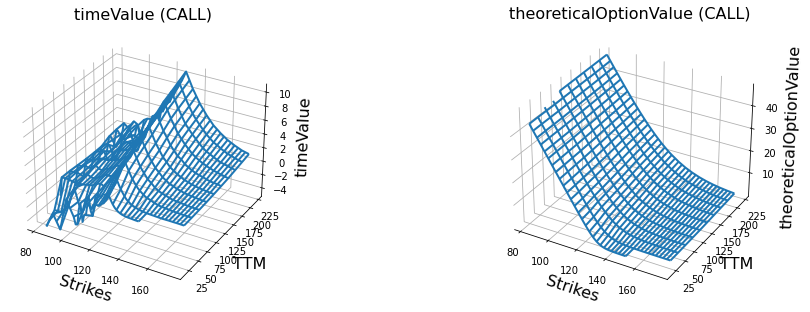

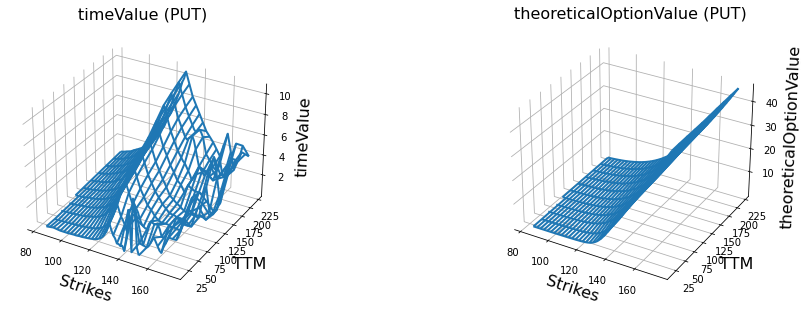

In [24]:
import requests, numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib.pyplot as plt

%matplotlib inline

#saquen su API key en https://developer.tdameritrade.com/content/getting-started
c_key = 'AHTVCOTFYX2LZZF5MEEFVD668VD64GQT'


def options(symbol):
    params = {'apikey' : c_key, 'symbol':symbol}
    endpoint = 'https://api.tdameritrade.com/v1/marketdata/chains'
    r = requests.get(url=endpoint ,params=params)
    return r.json()


def optionsDF(chain, k_min=0, k_max=1000, ttm_min=10, ttm_max=700):
    v_calls = list(chain['callExpDateMap'].values())
    v_puts = list(chain['putExpDateMap'].values())
    calls, puts = [], []

    for i in range(len(v_calls)):
        v = list(v_calls[i].values())    
        for j in range(len(v)):
            calls.append(v[j][0])

    for i in range(len(v_puts)):
        v = list(v_puts[i].values())    
        for j in range(len(v)):
            puts.append(v[j][0])

    contracts = pd.concat([pd.DataFrame(calls),pd.DataFrame(puts)])
    tabla = contracts.loc[contracts.daysToExpiration>0].copy()
    tabla['ticker'] = chain['symbol']        
    df_ok = tabla.loc[(tabla['strikePrice'] > k_min) & (tabla['strikePrice'] < k_max)]
    df_ok = df_ok.loc[(df_ok['daysToExpiration'] > ttm_min) & (df_ok['daysToExpiration'] < ttm_max)]   
    return df_ok


def prepararMalla(columna, df, leg=None):
    if leg:
        df = df.loc[df['putCall']==leg].copy()
        
    df_ok = df.loc[:,['strikePrice','daysToExpiration',columna]]
    df_ok = df_ok.replace('NaN',np.nan).dropna()    
    x_q = len(df_ok['strikePrice'].unique())
    y_q = len(df_ok['daysToExpiration'].unique())
    x1 = np.linspace(df_ok['strikePrice'].min(), df_ok['strikePrice'].max(), x_q)
    y1 = np.linspace(df_ok['daysToExpiration'].min(), df_ok['daysToExpiration'].max(), y_q)
    X, Y = np.meshgrid(x1, y1)
    Z = interpolate.griddata((df_ok['strikePrice'], df_ok['daysToExpiration']), df_ok[columna], (X, Y))
    return X,Y,Z, df_ok

def grafCols(cols, leg=None, size=(16,5)):
    fig = plt.figure(figsize=size)
    ax = [fig.add_subplot(1, len(cols), i+1, projection='3d') for i in range(len(cols))]
    for i in range(len(cols)):
        col = cols[i]
        df_greeks = data.copy()
        X,Y,Z,df = prepararMalla(col, df_greeks, leg=leg)    
        ax[i].plot_wireframe(X, Y, Z, color='tab:blue', lw=2)     
        ax[i].set_title(f'{col} ({leg})', fontsize=16, color='k')
        ax[i].set_xlabel('Strikes', fontsize=16, color='k')
        ax[i].set_ylabel('TTM', fontsize=16, color='k')
        ax[i].set_zlabel(col, fontsize=16, color='k')
        ax[i].w_xaxis.set_pane_color((0,0,0,0))
        ax[i].w_yaxis.set_pane_color((0,0,0,0))
        ax[i].w_zaxis.set_pane_color((0,0,0,0))

ticker = 'AAPL'
data = optionsDF(options(ticker), k_min=80, k_max=180, ttm_min=15, ttm_max=365)
grafCols(['delta','gamma'], 'CALL')
grafCols(['vega','theta'], 'CALL')
grafCols(['rho','volatility'], 'CALL')
grafCols(['percentChange','openInterest'], 'CALL')
grafCols(['timeValue','theoreticalOptionValue'], 'CALL')
grafCols(['timeValue','theoreticalOptionValue'], 'PUT')
plt.show()

<IPython.core.display.Javascript object>


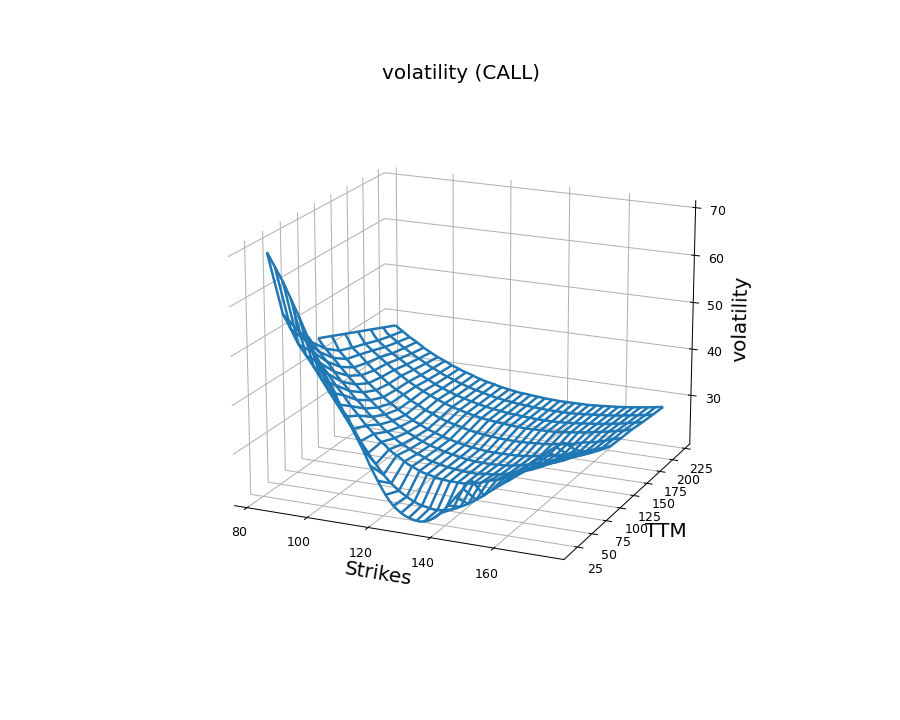

In [27]:
%matplotlib notebook

ticker = 'AAPL'
data = optionsDF(options(ticker), k_min=80, k_max=180, ttm_min=15, ttm_max=365)
grafCols(['volatility'], 'CALL', size=(10,8))

In [28]:
%matplotlib inline

# Otras APIs

* MarketStack
* Finnhub
* IEX
* FMP
* Tiingo



* ROFEX
* BYMA- IOL
* ALPACA

Links a APIs recomendadas


https://marketstack.com/


https://financialmodelingprep.com/


https://api.tiingo.com/documentation/general/


https://finnhub.io/


https://iexcloud.io/

Para interesados en patrones y AT

https://taapi.io/indicators/

Recomendada para testear bots en equity


https://alpaca.markets/

Recomendadas para Crypto


* hitbtc
* binance
* ftx
* cryptocompare

# Alpaca

Registrarse:


https://alpaca.markets/

Documentacion:


https://alpaca.markets/docs/

In [63]:
import requests
from keys_alpaca import *


# api_key = ''
# secret_key = ''
api_key

'PKM2I3GSMSRHVPGXID76'

In [30]:
def getAccount():    
    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://paper-api.alpaca.markets/v2/account"
    
    r = requests.get(url = endpoint, headers = headers)
    
    js = r.json()
    return js

In [31]:
cuenta  = getAccount()
cuenta

{'id': 'd65b2a84-d9c3-4c6d-8974-60dd3dadaac6',
 'account_number': 'PA38G07YBX5V',
 'status': 'ACTIVE',
 'currency': 'USD',
 'buying_power': '400000',
 'regt_buying_power': '200000',
 'daytrading_buying_power': '400000',
 'cash': '100000',
 'portfolio_value': '100000',
 'pattern_day_trader': False,
 'trading_blocked': False,
 'transfers_blocked': False,
 'account_blocked': False,
 'created_at': '2021-06-14T08:35:45.797123Z',
 'trade_suspended_by_user': False,
 'multiplier': '4',
 'shorting_enabled': True,
 'equity': '100000',
 'last_equity': '100000',
 'long_market_value': '0',
 'short_market_value': '0',
 'initial_margin': '0',
 'maintenance_margin': '0',
 'last_maintenance_margin': '0',
 'sma': '0',
 'daytrade_count': 0}

In [8]:
cuenta.keys()

dict_keys(['id', 'account_number', 'status', 'currency', 'buying_power', 'regt_buying_power', 'daytrading_buying_power', 'cash', 'portfolio_value', 'pattern_day_trader', 'trading_blocked', 'transfers_blocked', 'account_blocked', 'created_at', 'trade_suspended_by_user', 'multiplier', 'shorting_enabled', 'equity', 'last_equity', 'long_market_value', 'short_market_value', 'initial_margin', 'maintenance_margin', 'last_maintenance_margin', 'sma', 'daytrade_count'])

## MarketData

Vamos a ver como pedimos marketData con esta API, empecemos por la data histórica, le vamos a tener que pasar dos parámetros a la API:
   * TimeFrame
       * 1Min
       * 5Min
       * 15Min
       * 1D (day)
   * Symbolo/Simbolos

In [9]:
tickers = 'AAPL,MSFT'
tickers = tickers.split(",")
tickers

['AAPL', 'MSFT']

In [10]:
lista = ['GGAL','AAPL','AMZN']
','.join(lista)

'GGAL,AAPL,AMZN'

In [11]:
import datetime as dt
import pandas as pd

def getHistory(symbol, start, end, timeframe='1D'):    
    
    
    start = dt.datetime.strftime(start, format='%Y-%m-%dT%T-04:00')
    end = dt.datetime.strftime(end, format='%Y-%m-%dT%T-04:00')

    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    params =  {'symbols' : symbol, 'start':start, 'end':end}
    endpoint = "https://data.alpaca.markets/v1/bars/"+timeframe
    
    r = requests.get(url = endpoint, headers =headers, params=params)
    
    js = r.json()
    
    tickers = symbol.split(",")
    dfs = {}
    for ticker in tickers:
        dfs[ticker] = pd.DataFrame(js[ticker])
        dfs[ticker].t = pd.to_datetime(dfs[ticker].t, unit='s')
    return dfs

In [12]:
start = dt.datetime(2020,7,1,0,0,0)
end = dt.datetime(2020,10,1,0,0,0)

dfs = getHistory('AAPL,MSFT', start, end, timeframe='day')
dfs['AAPL']

,t,o,h,l,c,v
0,2020-07-01 04:00:00,365.12,367.36,363.91,364.01,25429807
1,2020-07-02 04:00:00,367.85,370.47,363.65,364.12,25332853
2,2020-07-06 04:00:00,370.00,375.78,369.87,373.81,26084791
3,2020-07-07 04:00:00,375.41,378.62,372.23,372.64,24610596
4,2020-07-08 04:00:00,376.72,381.50,376.36,381.44,26025692
...,...,...,...,...,...,...
60,2020-09-25 04:00:00,108.43,112.44,107.67,112.28,137542199
61,2020-09-28 04:00:00,114.98,115.32,112.78,115.00,119572328
62,2020-09-29 04:00:00,114.55,115.31,113.57,114.11,89125872
63,2020-09-30 04:00:00,113.77,117.25,113.62,115.61,115978209


## Ultimo Trade de un ticker

In [35]:
def lastTade(symbol):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://data.alpaca.markets/v1/last/stocks/"+symbol
    r = requests.get(url = endpoint, headers = headers)
    js = r.json()['last']
    
    js['timestamp'] = pd.to_datetime(js['timestamp'])
    return js
    
lastTade("GGAL")

{'price': 10.06,
 'size': 100,
 'exchange': 15,
 'cond1': 0,
 'cond2': 0,
 'cond3': 0,
 'cond4': 0,
 'timestamp': Timestamp('2021-06-15 19:59:30.215231721')}

## Ultimo dato del libro

In [34]:
import pandas as pd

def lastQuote(symbol):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://data.alpaca.markets/v1/last_quote/stocks/"+symbol
    r = requests.get(url = endpoint, headers = headers)
    js = r.json()['last']
    js['timestamp'] = pd.to_datetime(js['timestamp'])
    return js
    
lastQuote("GGAL")

{'askprice': 0,
 'asksize': 0,
 'askexchange': 15,
 'bidprice': 0,
 'bidsize': 0,
 'bidexchange': 15,
 'timestamp': Timestamp('2021-06-15 20:00:00.000040296')}

# Ruteo de ordenes

## Orden de Compra/Venta  (POST)

In [77]:
def order(symbol, qty, side, tipo, time_in_force, limit_price, notional=0 ):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    
    if notional > 0:
        params = {'symbol':symbol, 
                  'notional':notional, 
                  'side':side, 
                  'type':tipo,
                  'time_in_force':time_in_force,
                  'limit_price':limit_price, 
                  'order_class':'simple'
                 } 
    else:
        params = {'symbol':symbol, 
                  'qty':qty, 
                  'side':side, 
                  'type':tipo,
                  'time_in_force':time_in_force,
                  'limit_price':limit_price, 
                  'order_class':'simple'
                 }
    
    if tipo == 'market':
        del params['limit_price']
        
    r = requests.post(url = "https://paper-api.alpaca.markets/v2/orders", 
                      headers = headers, json = params)

    js = r.json()
    return js

In [40]:
lastQuote("AAPL")

{'askprice': 0,
 'asksize': 0,
 'askexchange': 15,
 'bidprice': 0,
 'bidsize': 0,
 'bidexchange': 15,
 'timestamp': Timestamp('2021-06-15 20:00:31.823498698')}

In [41]:
lastTade("AAPL")

{'price': 129.795,
 'size': 100,
 'exchange': 15,
 'cond1': 0,
 'cond2': 0,
 'cond3': 0,
 'cond4': 0,
 'timestamp': Timestamp('2021-06-15 19:59:59.406112099')}

## Envio varias órdenes

In [39]:
import time
tickers = ['AAPL', 'SPY', 'QQQ','TSLA', 'AMZN']
monto = 10000

for ticker in tickers:
    px_last = lastTade(ticker)['price'] 
    bid = lastQuote(ticker)['bidprice'] 
    px = bid * 1.0001
    
    # Preguntar si la api no pincho, y si el mercado esta "normal"
    if (bid > 0) & (bid/px_last-1 < 0.1):
        try:
            q = monto // px
            orden = order(symbol=ticker, qty=q, side='buy', tipo='limit', time_in_force='gtc', limit_price = px)
            print('ok',ticker, monto, px)
        except:
            print('error',ticker, monto, px)
    else:
        print(f'{ticker} no cumple condiciones, bid={bid}, ultimo_precio={px_last}')
    time.sleep(1)


AAPL no cumple condiciones, bid=0, ultimo_precio=129.795
SPY no cumple condiciones, bid=0, ultimo_precio=424.53
QQQ no cumple condiciones, bid=0, ultimo_precio=341.87
TSLA no cumple condiciones, bid=0, ultimo_precio=598.905
AMZN no cumple condiciones, bid=0, ultimo_precio=3381.73


### A mercado

In [59]:
tickers = ['AAPL', 'SPY', 'QQQ','TSLA', 'AMZN']

ordenes = []
for ticker in tickers:
    try:
        orden = order(symbol=ticker, notional=1000, side='buy', 
                      tipo='market',time_in_force='gtc',limit_price=None, qty=None)        
        ordenes.append(orden)
        print(orden)
    except Exception as e:
        print(e)
        print(f'\n****Fallo en {ticker}****')

{'code': 40010001, 'message': 'fractional orders must be DAY market orders'}
{'code': 40010001, 'message': 'fractional orders must be DAY market orders'}
{'code': 40010001, 'message': 'fractional orders must be DAY market orders'}
{'code': 40010001, 'message': 'fractional orders must be DAY market orders'}
{'code': 40010001, 'message': 'fractional orders must be DAY market orders'}


In [82]:
tickers = ['AAPL', 'SPY', 'QQQ','TSLA', 'AMZN', 'PAM','GGAL','CRESY','TGS','BBAR','LOMA']

for ticker in tickers:
    try:
        px = lastTade(ticker)['price'] 
        q = monto // px
        orden = order(symbol=ticker, qty=q, side='buy', tipo='market', time_in_force='gtc', limit_price = px)
        print('ok',ticker, monto, px)
    except:
        print('error',ticker, monto, px)

ok AAPL 10000 129.795
ok SPY 10000 424.6
ok QQQ 10000 341.87
ok TSLA 10000 598.905
ok AMZN 10000 3381.73
ok PAM 10000 17
ok GGAL 10000 10.06
ok CRESY 10000 6.93
ok TGS 10000 5.26
ok BBAR 10000 3.915
ok LOMA 10000 7.14


## Consulta de estado general

In [20]:
def orders(status="all", limit=500): 
    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    params = {'status':status, 
              'limit':limit}
    
    r = requests.get(url = "https://paper-api.alpaca.markets/v2/orders", 
                      headers = headers, params = params)

    js = r.json()
    df = pd.DataFrame(js)
    return df

listaOrdenes = orders(status='open')
listaOrdenes

## Consulta puntual  (GET)

In [37]:
def getOrder(orderID):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    base = "https://paper-api.alpaca.markets/v2/orders/"
    r = requests.get(url = base+orderID, headers = headers)
    
    js = r.json()
    return js

In [38]:
getOrder('9d701ae8-3738-490a-8b0e-9920609265af')

{'id': '9d701ae8-3738-490a-8b0e-9920609265af',
 'client_order_id': 'd871e5fc-47c1-4487-ad3a-44fa3119e85f',
 'created_at': '2021-05-26T22:36:11.103507Z',
 'updated_at': '2021-05-26T22:36:11.103507Z',
 'submitted_at': '2021-05-26T22:36:11.097865Z',
 'filled_at': None,
 'expired_at': None,
 'canceled_at': None,
 'failed_at': None,
 'replaced_at': None,
 'replaced_by': None,
 'replaces': None,
 'asset_id': 'b28f4066-5c6d-479b-a2af-85dc1a8f16fb',
 'symbol': 'SPY',
 'asset_class': 'us_equity',
 'notional': None,
 'qty': '23',
 'filled_qty': '0',
 'filled_avg_price': None,
 'order_class': 'simple',
 'order_type': 'limit',
 'type': 'limit',
 'side': 'buy',
 'time_in_force': 'gtc',
 'limit_price': '419.04',
 'stop_price': None,
 'status': 'accepted',
 'extended_hours': False,
 'legs': None,
 'trail_percent': None,
 'trail_price': None,
 'hwm': None}

## Modificación de orden  (PATCH)

In [39]:
def replaceOrder(order_id, qty=None, time_in_force=None, limit_price=None):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    params = {'qty':qty, 
              'time_in_force':time_in_force,
              'limit_price':limit_price}
    
    endpoint = "https://paper-api.alpaca.markets/v2/orders/"+order_id
    r = requests.patch(url = endpoint, headers = headers, json = params)
    
    js = r.json()
    return js

## Eliminar orden/ordenes (DELETE)

In [43]:
def cancelOrder(order_id):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://paper-api.alpaca.markets/v2/orders/"+order_id
    r = requests.delete(url = endpoint,headers = headers)

In [79]:
def rajemo():    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://paper-api.alpaca.markets/v2/orders"
    r = requests.delete(url = endpoint,headers = headers)
    return r.json()

In [81]:
#rajemo()

## Ver Posiciones Abiertas de la cuenta

In [42]:
def positions():    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://paper-api.alpaca.markets/v2/positions"
    r = requests.get(url = endpoint, headers = headers)
    js = r.json()
    
    if len(js):
        df = pd.DataFrame(positions())
        df = df.loc[:,['symbol','qty','side','avg_entry_price','market_value',
                       'cost_basis','unrealized_pl','current_price',
                       'lastday_price']]
    else:
        df = pd.DataFrame()
    return df
    
portf = positions()
portf

""


# Listado de acitivos

In [45]:
def assets(only_shorteables=False):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    r = requests.get(url = "https://paper-api.alpaca.markets/v2/assets", 
                      headers = headers)

    js = r.json()
    df = pd.DataFrame(js)
    df = df.loc[df.status=='active'].drop(['status','class','easy_to_borrow',
                                          'tradable','marginable'], axis=1)
    
    if only_shorteables:
        df= df.loc[df.shortable == True]
        
    return df

In [47]:
activos = assets(only_shorteables=True)
activos

,id,exchange,symbol,name,shortable,fractionable
0,ca56f277-6345-49e3-889a-6a748a4f1c79,NYSE,ABC,AmerisourceBergen Corp.,True,True
2,fd7ecda8-13ff-43e3-81cd-50a95a5f3bc9,NYSE,ABG,"Asbury Automotive Group, Inc.",True,False
3,6b84cb5b-cd55-4951-bc51-2adc2929571d,NYSE,ABM,"ABM Industries, Inc.",True,False
4,0f148c0c-7f48-4453-ad89-379f25c3cfea,NASDAQ,ABUS,Arbutus Biopharma Corporation Common Stock,True,False
6,739b64f4-2873-48f9-99a8-fcc2977cd19a,NASDAQ,ACAD,ACADIA Pharmaceuticals Inc. Common Stock,True,True
...,...,...,...,...,...,...
11816,1a7a56e3-a4d4-4244-b67b-edcb66100f1a,NASDAQ,USWS,"U.S. Well Services, Inc. Class A Common Stock",True,False
11817,27882f72-d8d8-48d1-9a36-6e0531fafb7a,NASDAQ,PIRS,"Pieris Pharmaceuticals, Inc. Common Stock",True,False
11819,fd77bf5e-eef3-48e0-a616-22b6a0ab9724,NYSE,EDU,"New Oriental Education and Technology Group, Inc.",True,True
11820,7aeb539e-b713-4a70-8a99-563ddc35f5bb,NASDAQ,NNDM,Nano Dimension Ltd. American Depositary Shares,True,True


## WatchLists

## CRUD

* create
* read
* update
* delete

### Ver listas creadas (R)

In [50]:
def watchlist():    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    r = requests.get(url = "https://paper-api.alpaca.markets/v2/watchlists", 
                      headers = headers)

    js = r.json()
    df = pd.DataFrame(js)
    try:
        df.drop('account_id',axis=1, inplace=True)
    except:
        pass
    
    return df

In [51]:
watchlist()

,id,created_at,updated_at,name
0,3dbc0193-a0e9-4a98-8866-179eedd497db,2021-05-26T21:16:49.755463Z,2021-05-26T21:16:49.755463Z,Primary Watchlist


### Obtener watchList xID

In [54]:
def getWatchlist(wID):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    base = 'https://paper-api.alpaca.markets/v2/watchlists/'
    r = requests.get(url = base + wID, headers = headers)

    js = r.json()
    df = pd.DataFrame(js['assets'])
    try:
        df.set_index('symbol', inplace=True)
        df = df.loc[df.status=='active'].drop(['status','class','easy_to_borrow',
                                              'tradable','marginable'], axis=1)
    except:
        pass
    return df

In [55]:
wl = watchlist()
wl

,id,created_at,updated_at,name
0,3dbc0193-a0e9-4a98-8866-179eedd497db,2021-05-26T21:16:49.755463Z,2021-05-26T21:16:49.755463Z,Primary Watchlist


In [56]:
getWatchlist("3dbc0193-a0e9-4a98-8866-179eedd497db")

""


### Crear listas  (C)

In [57]:
def createWatchlist(name, symbols):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    params = {'name':name, 'symbols':symbols}
    r = requests.post(url = "https://paper-api.alpaca.markets/v2/watchlists", 
                      headers = headers, json=params)
    
    js = r.json()
    try:
        df = pd.DataFrame(js['assets'])
        df.set_index('symbol', inplace=True)
        df = df.loc[df.status=='active'].drop(['status','class','easy_to_borrow',
                                              'tradable','marginable'], axis=1)
        
        id = js['id']
    except:
        id = None
        df = pd.DataFrame()
        print(js)
    
    return id, df

In [58]:
createWatchlist('Lista2',['AAPL','FB'])

('e9746729-be2c-48ca-9d1f-12f14ae7609a',
                                           id exchange  \
 symbol                                                  
 AAPL    b0b6dd9d-8b9b-48a9-ba46-b9d54906e415   NASDAQ   
 FB      fc6a5dcd-4a70-4b8d-b64f-d83a6dae9ba4   NASDAQ   
 
                                        name  shortable  fractionable  
 symbol                                                                
 AAPL                Apple Inc. Common Stock       True          True  
 FB      Facebook, Inc. Class A Common Stock       True          True  )

In [59]:
createWatchlist('Lista2',['GGAL','AMZN'])

{'code': 40010001, 'message': 'watchlist name must be unique'}


(None,
 Empty DataFrame
 Columns: []
 Index: [])

In [60]:
createWatchlist('Lista3',['AAPL','FBBBB'])

{'code': 40010001, 'message': 'asset not found: FBBBB'}


(None,
 Empty DataFrame
 Columns: []
 Index: [])

In [61]:
wl = watchlist()

lista2_id = wl.loc[wl.name=="Lista2",'id'].values[0]
getWatchlist(lista2_id)

,id,exchange,name,shortable,fractionable
symbol,,,,,
AAPL,b0b6dd9d-8b9b-48a9-ba46-b9d54906e415,NASDAQ,Apple Inc. Common Stock,True,True
FB,fc6a5dcd-4a70-4b8d-b64f-d83a6dae9ba4,NASDAQ,"Facebook, Inc. Class A Common Stock",True,True


In [63]:
wl

,id,created_at,updated_at,name
0,e9746729-be2c-48ca-9d1f-12f14ae7609a,2021-05-26T23:24:57.646446Z,2021-05-26T23:24:57.646446Z,Lista2
1,3dbc0193-a0e9-4a98-8866-179eedd497db,2021-05-26T21:16:49.755463Z,2021-05-26T21:16:49.755463Z,Primary Watchlist


### Borrar watchList xID

In [64]:
def deleteWatchlist(wID):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    endpoint = "https://paper-api.alpaca.markets/v2/watchlists/"+wID
    r = requests.delete(url = endpoint, headers = headers)
    js = r.text
    return js

In [65]:
wl = watchlist()

lista2_id = wl.loc[wl.name=="Lista2",'id'][0]
deleteWatchlist(lista2_id)

''

In [66]:
watchlist()

,id,created_at,updated_at,name
0,3dbc0193-a0e9-4a98-8866-179eedd497db,2021-05-26T21:16:49.755463Z,2021-05-26T21:16:49.755463Z,Primary Watchlist


### Modificar watchList xID (PUT)

In [67]:
def updateWatchlist(wID, lista):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    params = {'symbols': lista}
    endpoint = "https://paper-api.alpaca.markets/v2/watchlists/"+wID
    r = requests.put(url = endpoint, headers = headers, json=params)
    
    return r

In [69]:
modif = updateWatchlist(wID='3dbc0193-a0e9-4a98-8866-179eedd497db', lista=['GGAL', 'AAPL', 'GOOGL'])
modif

<Response [200]>

### Agregar Ticker a una watchList existente (POST)

In [71]:
def addTicker(wID, symbol):    
    headers ={"APCA-API-KEY-ID" : api_key, "APCA-API-SECRET-KEY":secret_key}
    params = {'symbol': symbol}
    endpoint = "https://paper-api.alpaca.markets/v2/watchlists/"+wID
    r = requests.post(url = endpoint, headers = headers, json=params)
    js = r.json()
    df = pd.DataFrame(js['assets'])
    df.set_index('symbol', inplace=True)
    df = df.loc[df.status=='active'].drop(['status','class','easy_to_borrow',
                                          'tradable','marginable'], axis=1)
    
    return df

In [72]:
watchlist()

,id,created_at,updated_at,name
0,3dbc0193-a0e9-4a98-8866-179eedd497db,2021-05-26T21:16:49.755463Z,2021-05-26T23:32:50.891665Z,Primary Watchlist


In [73]:
wl = watchlist()

pw_id = wl.loc[wl.name=="Primary Watchlist",'id'].values[0]
addTicker(pw_id,'SPY')

,id,exchange,name,shortable,fractionable
symbol,,,,,
GGAL,d811ca12-80f0-4cd0-a6b8-917655c82ded,NASDAQ,Grupo Financiero Galicia S.A. American Deposit...,True,False
AAPL,b0b6dd9d-8b9b-48a9-ba46-b9d54906e415,NASDAQ,Apple Inc. Common Stock,True,True
GOOGL,69b15845-7c63-4586-b274-1cfdfe9df3d8,NASDAQ,Alphabet Inc. Class A Common Stock,True,True
SPY,b28f4066-5c6d-479b-a2af-85dc1a8f16fb,ARCA,SPDR S&P 500 ETF Trust,True,True
